In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
from imutils import paths
import time   # time1 = time.time(); print('Time taken: {:.1f} sec'.format(time.time() - time1))
import cv2
import pickle
import warnings
from PIL import Image
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/MyDrive', force_remount=True)
!ls /content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/

unset HISTFILE; export PS1="root@ac6007b78723-0827f4f463c04a74962053fa7e056778: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@ac6007b78723-0827f4f463c04a74962053fa7e056778: umount -f /content/MyDrive || umount /content/MyDrive; pkill -9 -x drive
umount: /content/MyDrive: no mount point specified.
umount: /content/MyDrive: no mount point specified.
root@ac6007b78723-0827f4f463c04a74962053fa7e056778: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@ac6007b78723-0827f4f463c04a74962053fa7e056778: ( while `sleep 0.5`; do if [[ -d "/content/MyDrive" && "$(ls -A /content/MyDrive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 610
root@ac6007b78723-0827f4f463c04a74962053fa7e056778: ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:10,opendir_timeout_ms:120000,virt

<class 'PIL.Image.Image'>
None
L
(150, 150)


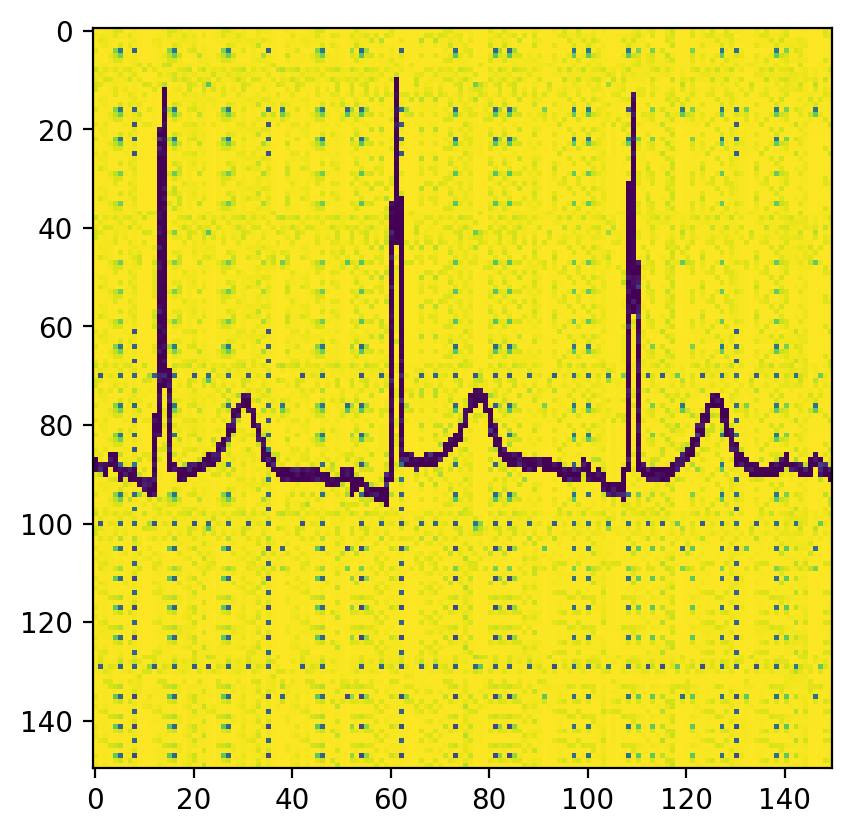

In [5]:
img = image.load_img('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/Normal/Cropped_Images/Normal_100Cropped_lead4.png', grayscale=True, target_size=(150,150))

print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
plt.imshow(img)

In [6]:
img_array = image.img_to_array(img)
print(img_array.dtype)
print(img_array.shape)
img_back = image.array_to_img(img_array)
# plt.imshow(img_back)

float32
(150, 150, 1)


In [10]:
import os

images = []
labels = []

dirs = ['Normal', 'MI', 'HB', 'PMI']

for dir in dirs:
  print(dir)
  for filename in os.listdir('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/{}/Cropped_Images/'.format(dir)):
    if filename.endswith("png") and "lead4" in filename:
      # print(dir,filename)
      images.append('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/{}/Cropped_Images/{}'.format(dir,filename))
      # if dir == 'ECGImagesofCOVID-19Patients':
      #   labels.append(1)
      if dir == 'Normal':
        labels.append(1)
      elif dir == 'MI':
        labels.append(2)
      elif dir == 'HB':
        labels.append(3)
      elif dir == 'PMI':
        labels.append(0)

df = pd.DataFrame({"image":images, "label":labels})
df
df.to_csv("ECG_cropped_lead4.csv", index=False)
!cp "ECG_cropped_lead4.csv" "/content/MyDrive/MyDrive/ECG/"

Normal
MI
HB
PMI


In [11]:

df
df.to_csv("ECG_cropped_lead4.csv", index=False)
!cp "ECG_cropped_lead4.csv" "/content/MyDrive/MyDrive/ECG/CSV_data_v2/"

In [12]:
df

,image,label
0,/content/MyDrive/MyDrive/ECG/CroppedECGImages_...,1
1,/content/MyDrive/MyDrive/ECG/CroppedECGImages_...,1
2,/content/MyDrive/MyDrive/ECG/CroppedECGImages_...,1
3,/content/MyDrive/MyDrive/ECG/CroppedECGImages_...,1
4,/content/MyDrive/MyDrive/ECG/CroppedECGImages_...,1
...,...,...
927,/content/MyDrive/MyDrive/ECG/CroppedECGImages_...,0
928,/content/MyDrive/MyDrive/ECG/CroppedECGImages_...,0
929,/content/MyDrive/MyDrive/ECG/CroppedECGImages_...,0
930,/content/MyDrive/MyDrive/ECG/CroppedECGImages_...,0


In [13]:
imagedata = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('{}'.format(df["image"][i]), target_size=(150,150,1), grayscale=True) #, grayscale=True
    img = image.img_to_array(img)
    img = img/255
    imagedata.append(img)
X = np.array(imagedata)

100%|██████████| 932/932 [10:47<00:00,  1.44it/s]


In [15]:
y=df['label'].values
y = to_categorical(y) #one-hot encoding

In [16]:
np.save('X_data_v2_croppedimages_lead4_150150.npy', X)
!cp "X_data_v2_croppedimages_lead4_150150.npy" "/content/MyDrive/MyDrive/ECG/"

np.save('y_data_v2_croppedimages_lead4_150150.npy', y)
!cp "y_data_v2_croppedimages_lead4_150150.npy" "/content/MyDrive/MyDrive/ECG/"

In [17]:
X_load = np.load('/content/MyDrive/MyDrive/ECG/X_data_v2_croppedimages_lead4_150150.npy')
y_load = np.load('/content/MyDrive/MyDrive/ECG/y_data_v2_croppedimages_lead4_150150.npy')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_load, y_load, random_state=100, test_size=0.2, shuffle=True, stratify=y_load)

In [19]:
# model = Sequential()
# model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))


model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=(150,150,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      73792     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 152352)            0         
                                                        

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [22]:
history=model.fit(X_train, y_train, epochs=17, validation_data=(X_test, y_test))

Epoch 1/17
24/24 [==============================] - 291s 12s/step - loss: 1.4874 - accuracy: 0.2913 - val_loss: 1.3670 - val_accuracy: 0.2567
Epoch 2/17
24/24 [==============================] - 277s 12s/step - loss: 1.1946 - accuracy: 0.5087 - val_loss: 0.9215 - val_accuracy: 0.6043
Epoch 3/17
24/24 [==============================] - 269s 11s/step - loss: 0.6055 - accuracy: 0.7678 - val_loss: 0.5458 - val_accuracy: 0.7861
Epoch 4/17
24/24 [==============================] - 271s 11s/step - loss: 0.2171 - accuracy: 0.9356 - val_loss: 0.4503 - val_accuracy: 0.8396
Epoch 5/17
24/24 [==============================] - 270s 11s/step - loss: 0.1054 - accuracy: 0.9638 - val_loss: 0.5026 - val_accuracy: 0.8503
Epoch 6/17
24/24 [==============================] - 269s 11s/step - loss: 0.0457 - accuracy: 0.9852 - val_loss: 0.5498 - val_accuracy: 0.8824
Epoch 7/17
24/24 [==============================] - 270s 11s/step - loss: 0.0212 - accuracy: 0.9919 - val_loss: 0.9832 - val_accuracy: 0.8289
Epoch 

In [23]:
model.save("bestCNN2D.h5")

In [24]:
!cp bestCNN2D.h5 "/content/MyDrive/MyDrive/ECG/"

In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1109868288040161
Test accuracy: 0.866310179233551


In [26]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


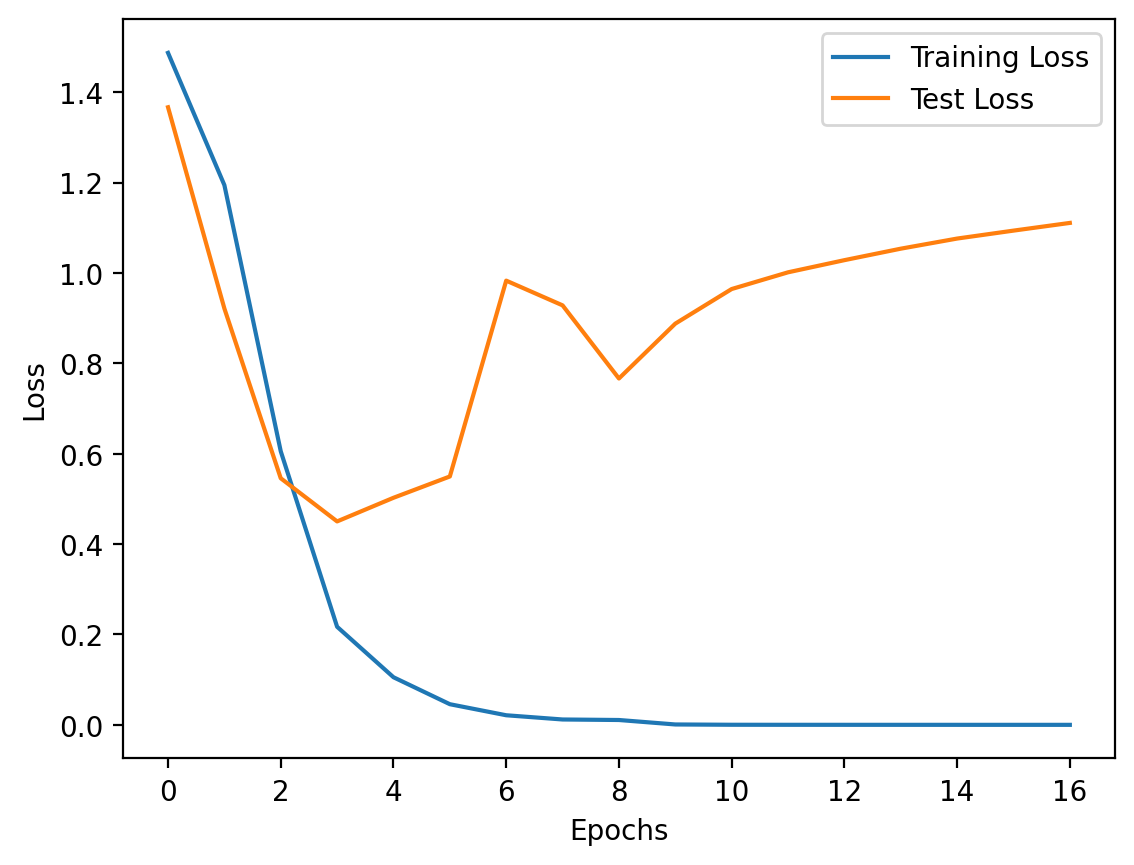

In [27]:
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("Loss_2DCNN.png", dpi=300, bbox_inches="tight")
!cp "Loss_2DCNN.png" "/content/MyDrive/MyDrive/ECG/"

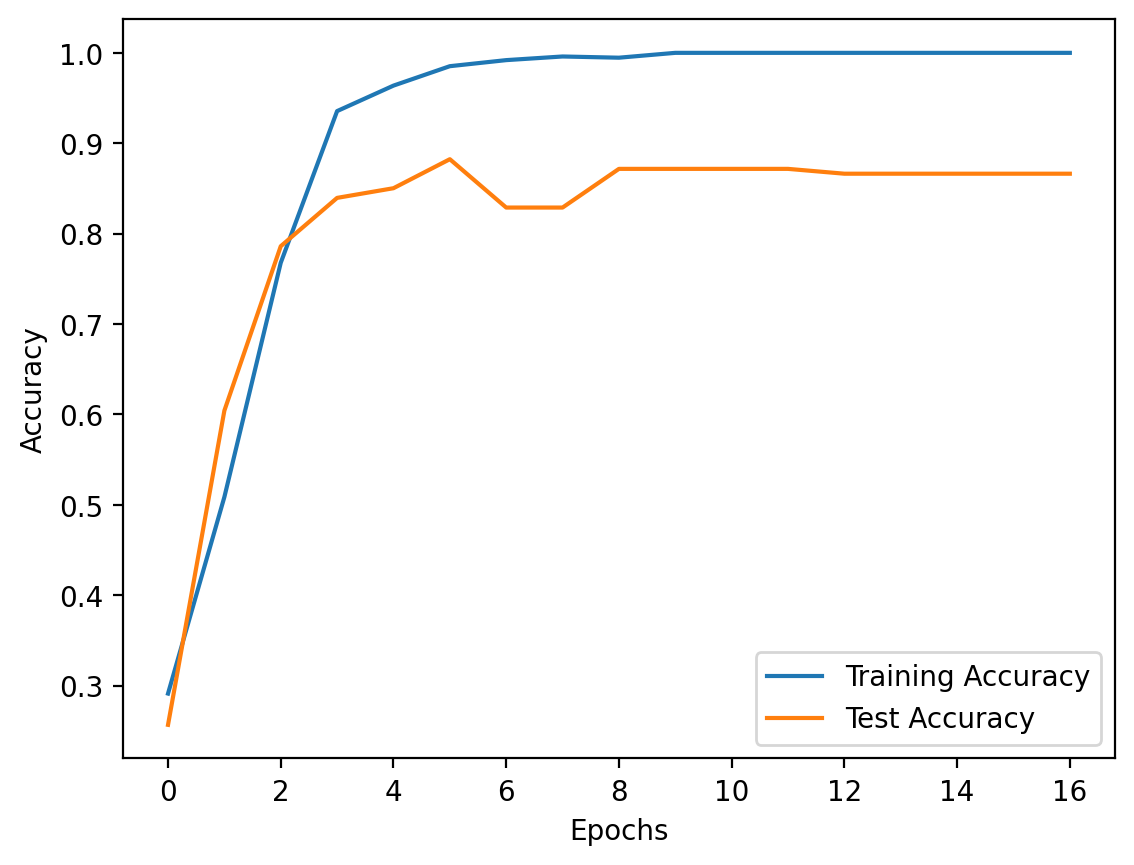

In [28]:
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("Accuracy_2DCNN.png", dpi=300, bbox_inches="tight")
!cp "Accuracy_2DCNN.png" "/content/MyDrive/MyDrive/ECG/"

In [29]:
import sklearn.metrics as metrics

y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
# print(y_test_pred_labels)
y_test_labels = np.argmax(y_test, axis=1)
# print(y_test_labels)
confusion_matrix = metrics.confusion_matrix(y_true=y_test_labels, y_pred=y_test_pred_labels)

6/6 [==============================] - 18s 3s/step


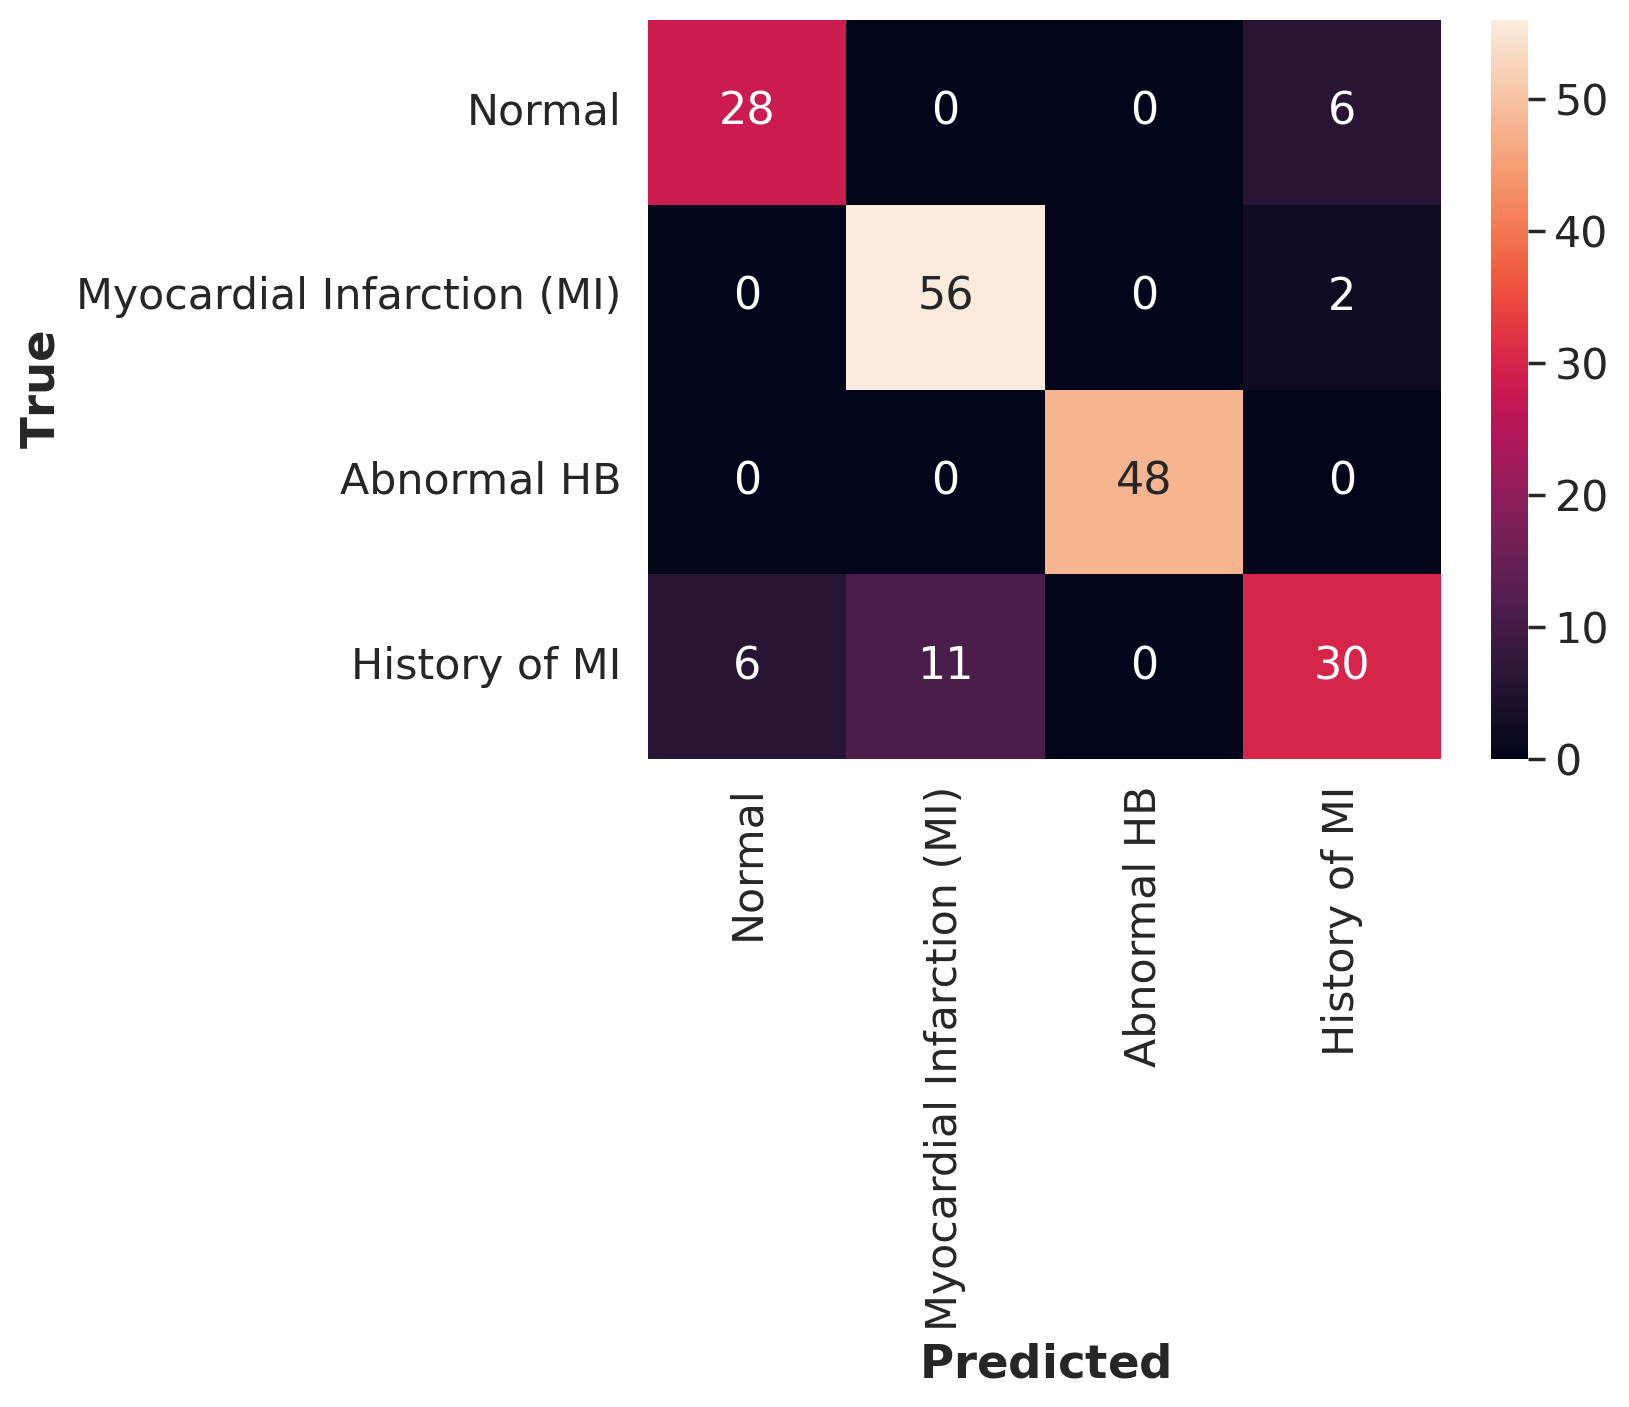

In [30]:
x_axis_labels = ["Normal", "Myocardial Infarction (MI)", "Abnormal HB", "History of MI"]
y_axis_labels = ["Normal", "Myocardial Infarction (MI)", "Abnormal HB", "History of MI"]

df_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels) # font size


plt.xlabel(r"$\bf{Predicted}$")
plt.ylabel(r"$\bf{True}$")

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# red_patch = mpatches.Patch(color=None, label='The red data')
# blue_patch = mpatches.Patch(color='blue', label='The blue data')

# plt.legend(handles=[red_patch, blue_patch], bbox_to_anchor=(1.25, 1), loc='upper left')
# plt.tight_layout()
plt.savefig("Confusion_matrix_2DCNN.png", dpi=300, bbox_inches="tight")

plt.show()

!cp "Confusion_matrix_2DCNN.png" "/content/MyDrive/MyDrive/ECG/"

In [31]:
from sklearn.metrics import classification_report

df = pd.DataFrame(classification_report(y_test_pred_labels,
                                        y_test_labels, digits=2,
                                        output_dict=True)).T
df['support'] = df.support.apply(int)
df.rename(index={'0':'Normal', '1':'Myocardial Infarction (MI)', '2':'Abnormal HB', '3':'History of MI'}, inplace=True)
df = df[0:4]
df.style.background_gradient(cmap='viridis')

# from pandas.plotting import table

# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, df)  # where df is your data frame

# plt.savefig('Scores_2DCNN.png',dpi=300)
# !cp "Scores_2DCNN.png" "/content/MyDrive/MyDrive/ECG/"

,precision,recall,f1-score,support
Normal,0.823529,0.823529,0.823529,34
Myocardial Infarction (MI),0.965517,0.835821,0.896000,67
Abnormal HB,1.000000,1.000000,1.000000,48
History of MI,0.638298,0.789474,0.705882,38


In [32]:
# from sklearn.metrics import precision_recall_curve
# precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred)
# plt.step(recall, precision, color='b', alpha=0.2,
#          where='post')
# plt.fill_between(recall, precision, alpha=0.2, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])

In [33]:
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (3, 3, 1, 128)
conv2d_1 (3, 3, 128, 64)
conv2d_2 (3, 3, 64, 32)
conv2d_3 (3, 3, 32, 32)


conv2d (3, 3, 1, 128)
128


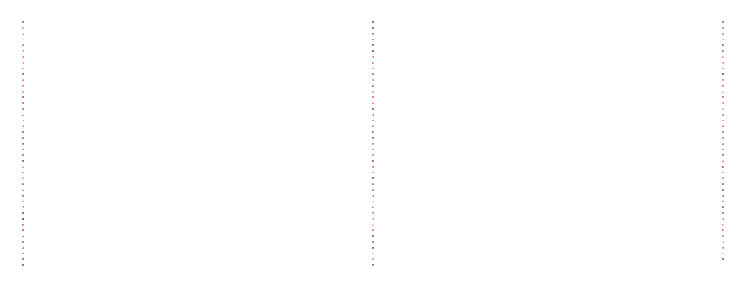

conv2d_1 (3, 3, 128, 64)
64


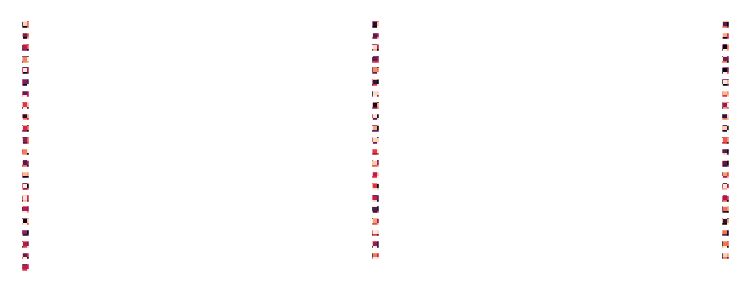

conv2d_2 (3, 3, 64, 32)
32


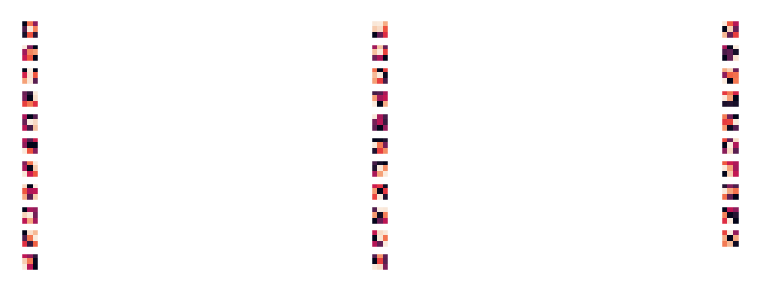

conv2d_3 (3, 3, 32, 32)
32


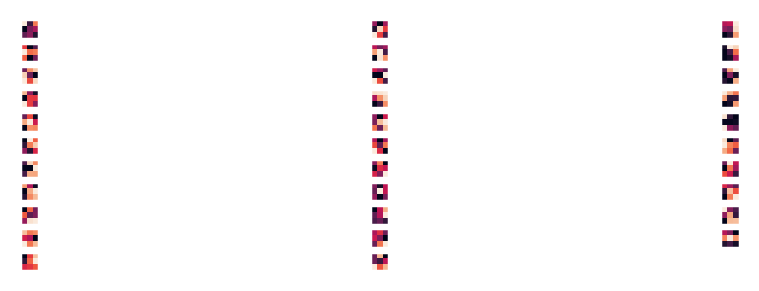

In [34]:
#Iterate thru all the layers of the model
layer_num=0
for layer in model.layers:
    layer_num+=1
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, weights.shape)

        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)
        print(filters.shape[3])
        filter_cnt=1


        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(1):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        # plt.savefig("filter_layer{}.png".format(layer_num), dpi=300)

        plt.show()

# !cp "filter_layer1.png" "/content/MyDrive/MyDrive/ECG/"
# !cp "filter_layer2.png" "/content/MyDrive/MyDrive/ECG/"
# !cp "filter_layer3.png" "/content/MyDrive/MyDrive/ECG/"

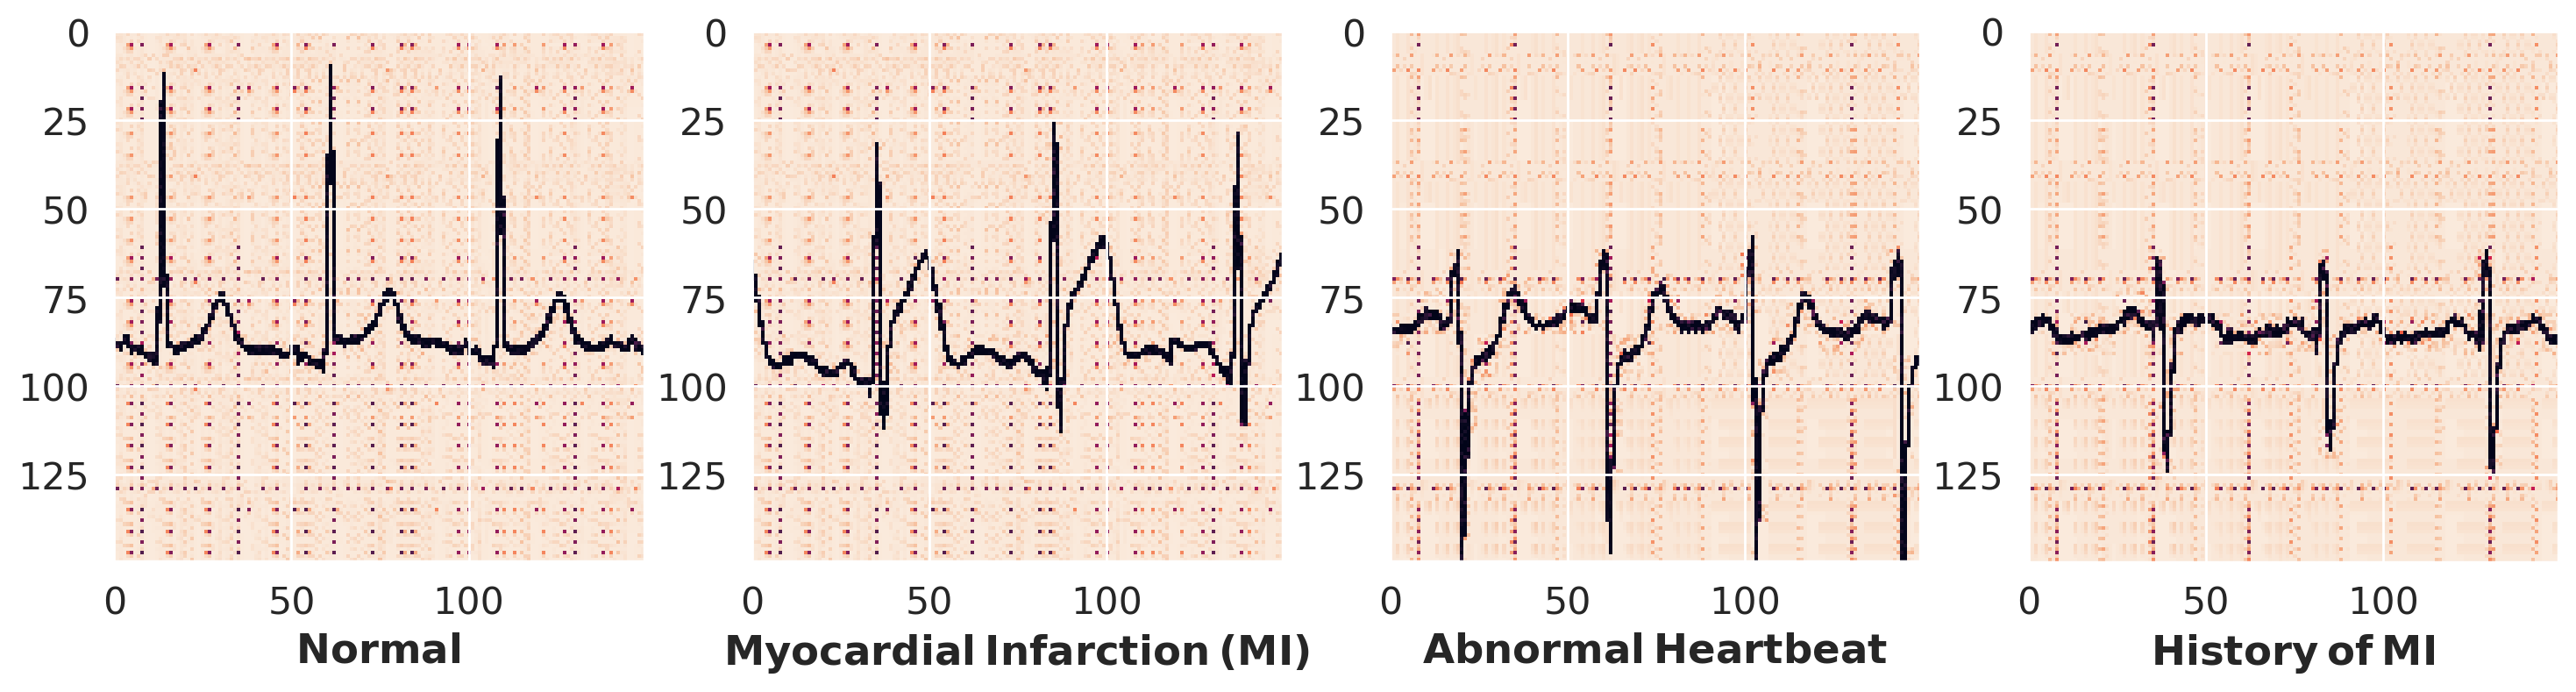

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 5))
img0 = image.load_img('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/Normal/Cropped_Images/Normal_100Cropped_lead4.png', grayscale=True, target_size=(150,150)) #target_size=(28,28), grayscale=True
ax1.imshow(img0)
ax1.set_xlabel(r"$\bf{Normal}$")
img1 = image.load_img('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/MI/Cropped_Images/MI_20Cropped_lead4.png', grayscale=True, target_size=(150,150)) #target_size=(28,28), grayscale=True
ax2.imshow(img1)
ax2.set_xlabel(r"$\bf{Myocardial\: Infarction\:  (MI)}$")
img2 = image.load_img('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/HB/Cropped_Images/HB_20Cropped_lead4.png', grayscale=True, target_size=(150,150)) #target_size=(28,28), grayscale=True
ax3.imshow(img2)
ax3.set_xlabel(r"$\bf{Abnormal\:  Heartbeat}$")
img3 = image.load_img('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/PMI/Cropped_Images/PMI_20Cropped_lead4.png', grayscale=True, target_size=(150,150)) #target_size=(28,28), grayscale=True
ax4.imshow(img3)
ax4.set_xlabel(r"$\bf{History\:  of\:  MI}$")

fig.savefig("representative_ECG_images.png",dpi=300)
! cp "representative_ECG_images.png" "/content/MyDrive/MyDrive/ECG/"

In [38]:
def showfeaturemap(img_path='/content/MyDrive/MyDrive/ECG/data_v2/ECGImagesofMyocardialInfarctionPatients/Cropped_Images/MI_1Cropped_lead4.png'):

  # Output= intermediate representations for all layers in the
  # previous model after the first.
  successive_outputs = [layer.output for layer in model.layers[0:]]
  #visualization_model = Model(img_input, successive_outputs)
  visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
  #Load the input image
  img = load_img(img_path, target_size=(150, 150), grayscale=True)
  # Convert ht image to Array of dimension (150,150,3)
  x   = img_to_array(img)
  x   = x.reshape((1,) + x.shape)

  print(x.shape)
  # Rescale by 1/255
  x /= 255.0
  # Let's run input image through our vislauization network
  # to obtain all intermediate representations for the image.
  successive_feature_maps = visualization_model.predict(x)
  # Retrieve are the names of the layers, so can have them as part of our plot
  layer_names = [layer.name for layer in model.layers]
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    # print(feature_map.shape)
    if len(feature_map.shape) == 4:

      # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

      n_features = feature_map.shape[-1]  # number of features in the feature map
      size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

      # We will tile our images in this matrix
      display_grid = np.zeros((size, size * n_features))

      # Postprocess the feature to be visually palatable
      for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        # Tile each filter into a horizontal grid
        display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
      scale = 20. / n_features
      plt.figure( figsize=(scale * n_features, scale) )
      plt.title ( layer_name )
      plt.grid  ( False )
      plt.imshow( display_grid, aspect='auto', cmap='viridis' )


(1, 150, 150, 1)
1/1 [==============================] - 2s 2s/step


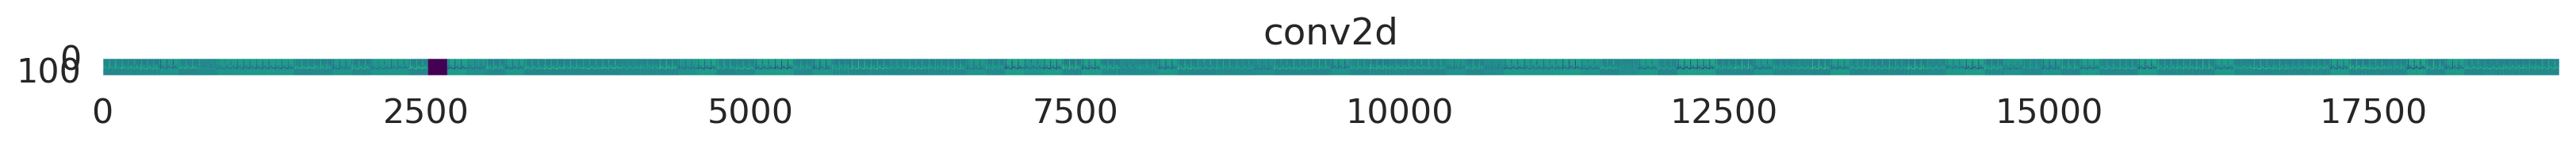

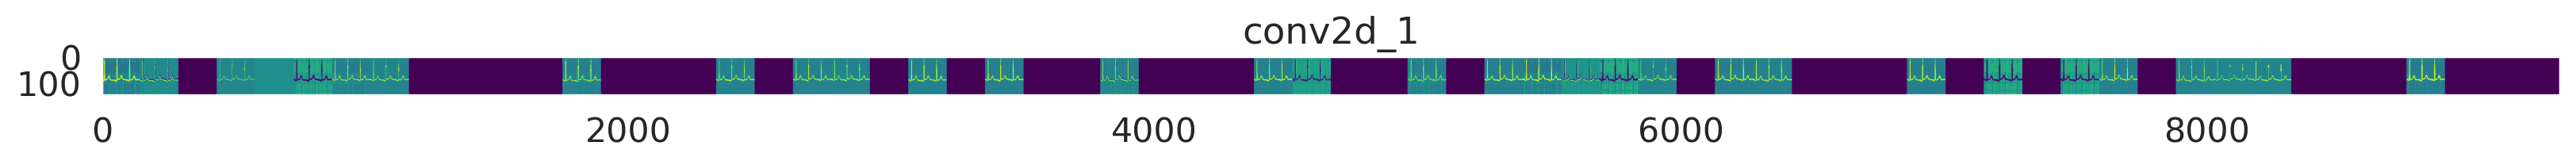

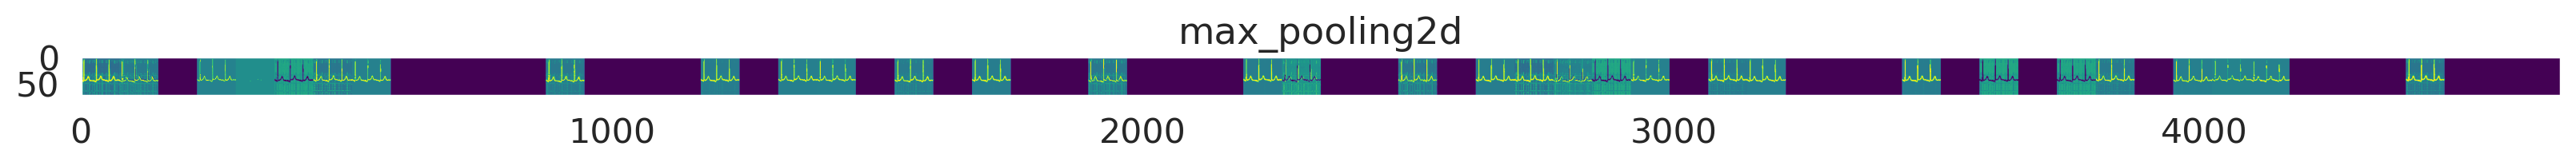

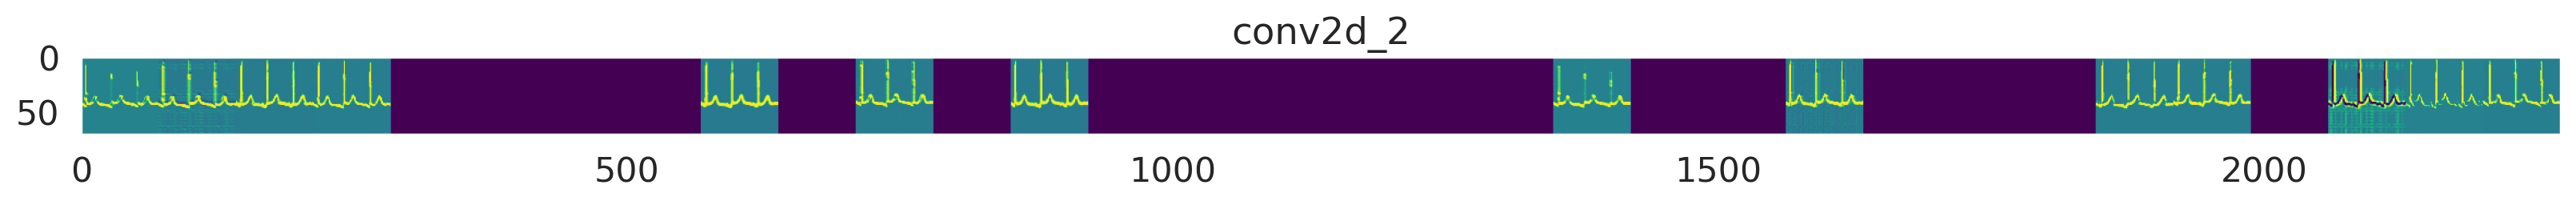

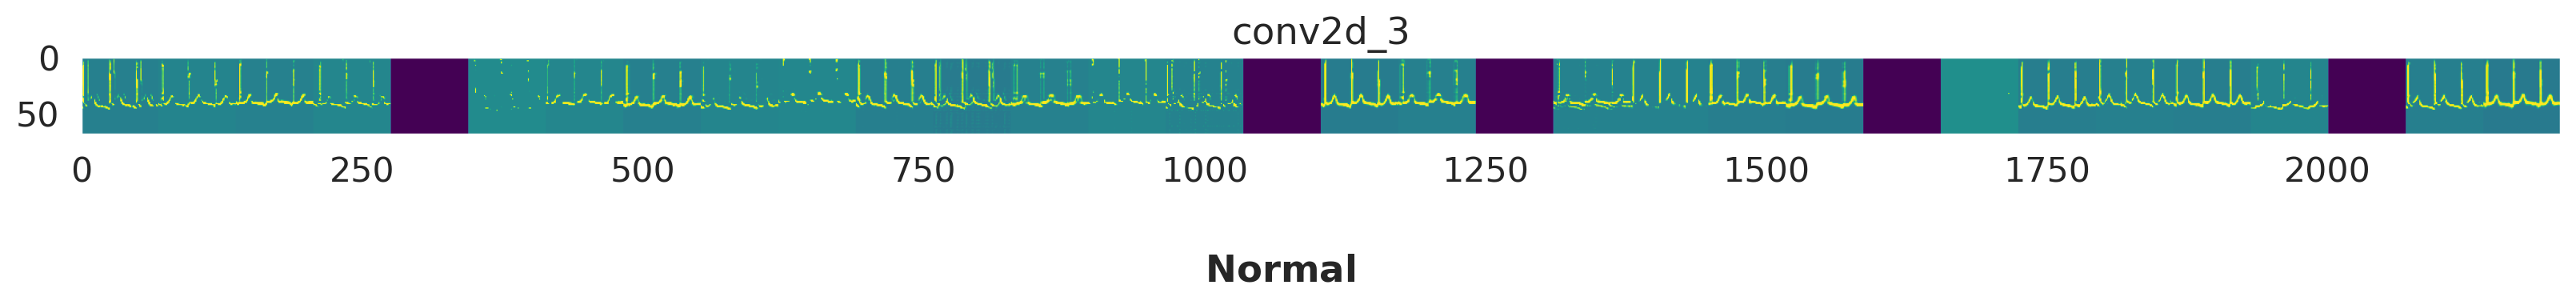

In [40]:
showfeaturemap('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/Normal/Cropped_Images/Normal_100Cropped_lead4.png')
plt.text(1000,200,r"$\bf{Normal}$")
plt.show()

(1, 150, 150, 1)
1/1 [==============================] - 0s 318ms/step


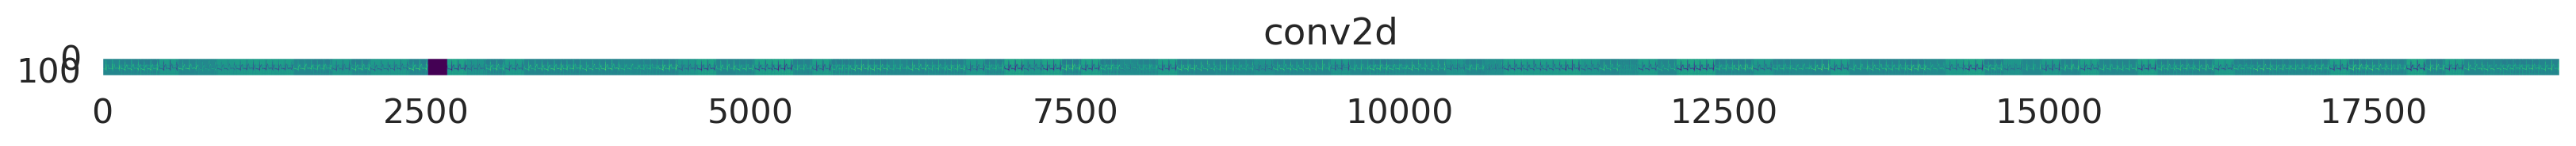

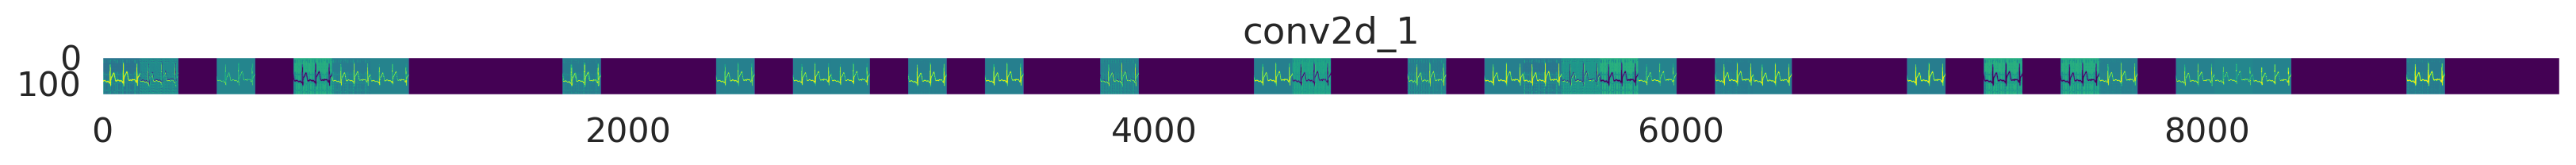

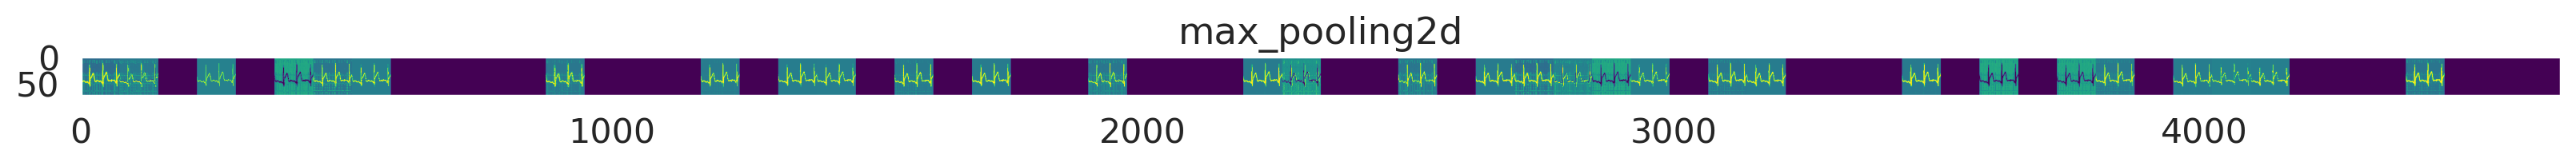

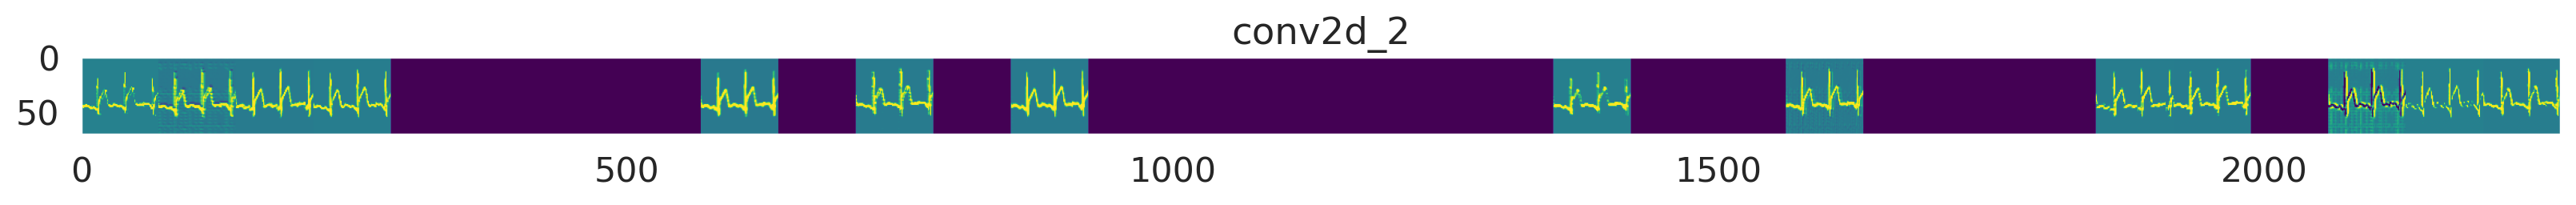

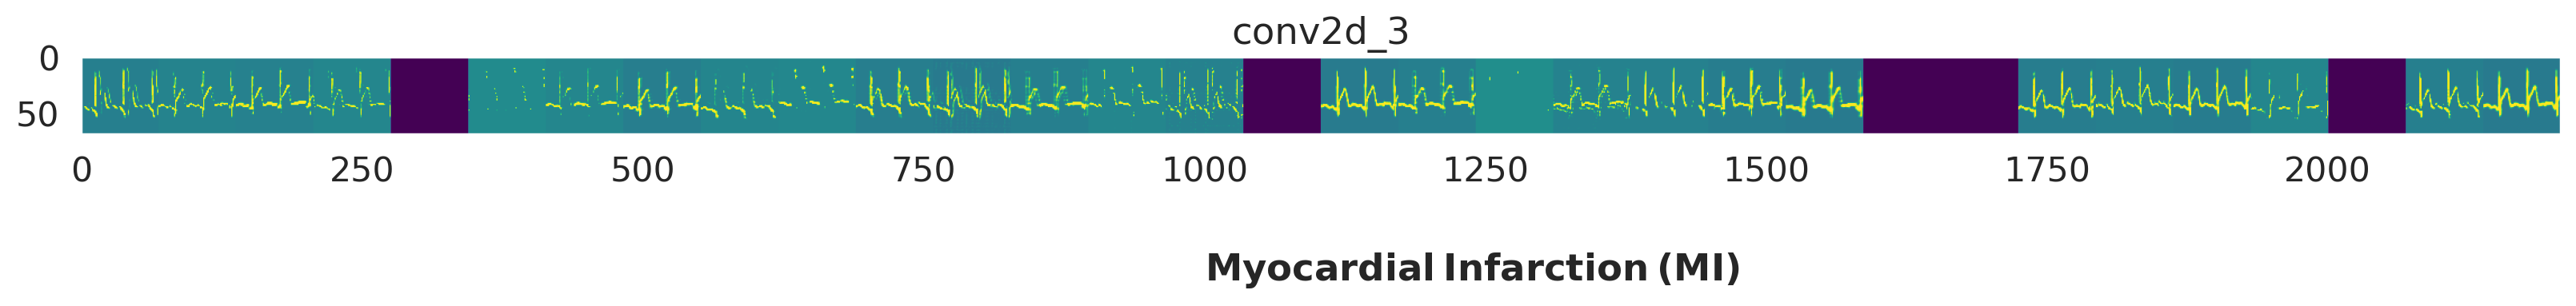

In [41]:
showfeaturemap('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/MI/Cropped_Images/MI_20Cropped_lead4.png')
plt.text(1000,200,r"$\bf{Myocardial\: Infarction\: (MI)}$")
plt.show()


(1, 150, 150, 1)
1/1 [==============================] - 0s 315ms/step


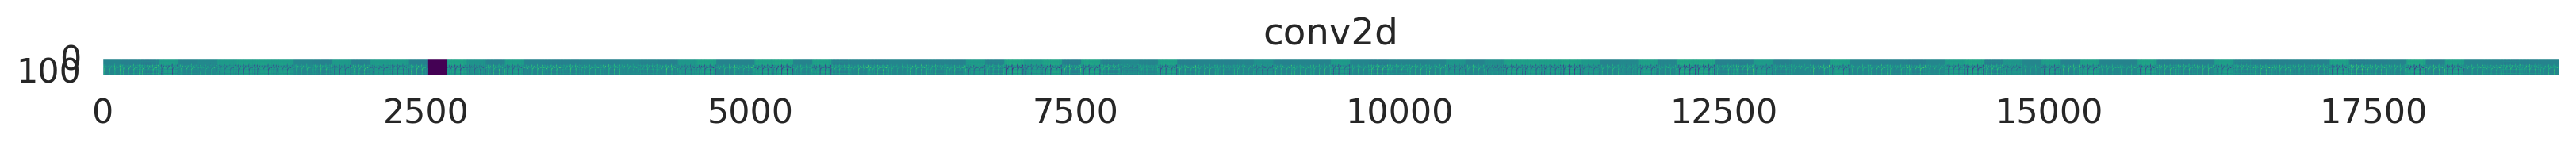

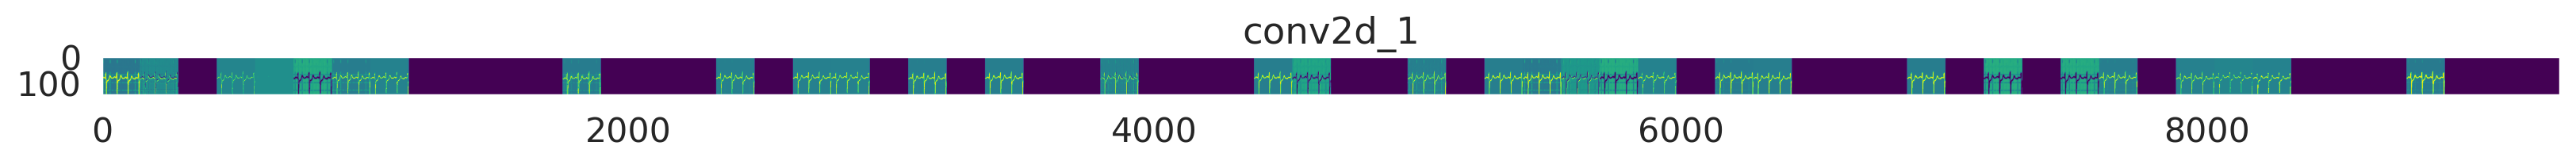

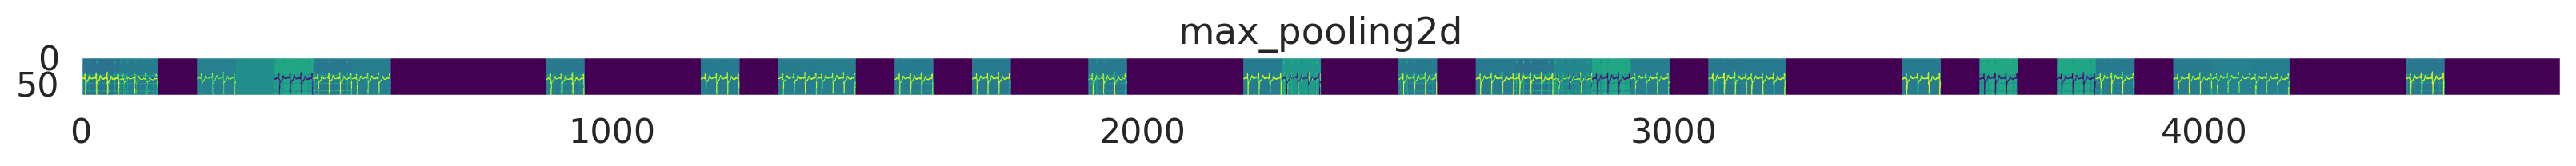

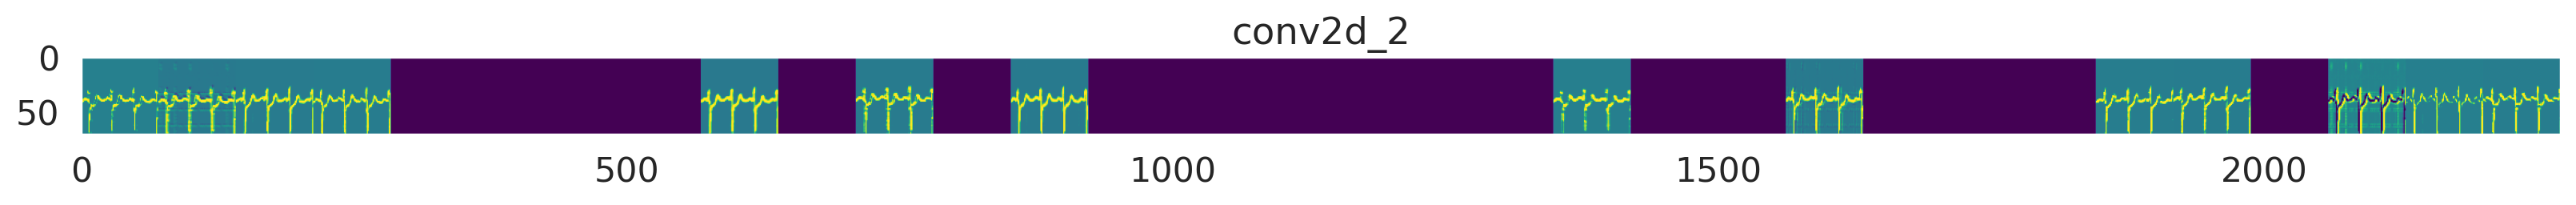

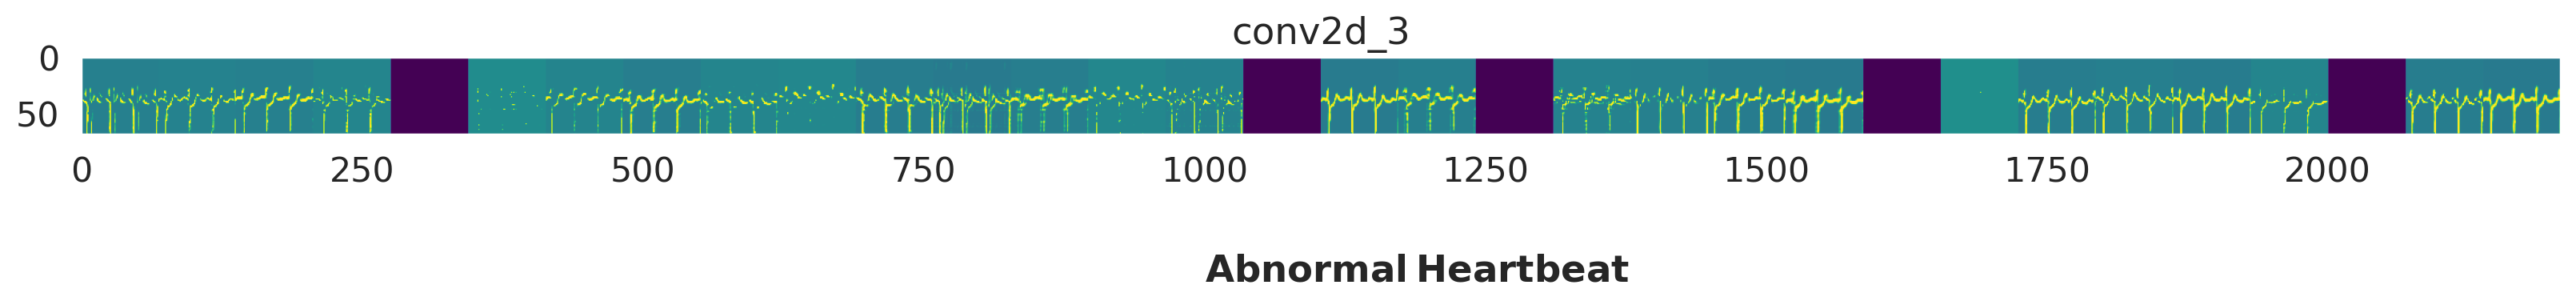

In [42]:
showfeaturemap('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/HB/Cropped_Images/HB_20Cropped_lead4.png')
plt.text(1000,200,r"$\bf{Abnormal\: Heartbeat}$")
plt.show()

(1, 150, 150, 1)


1/1 [==============================] - 0s 187ms/step


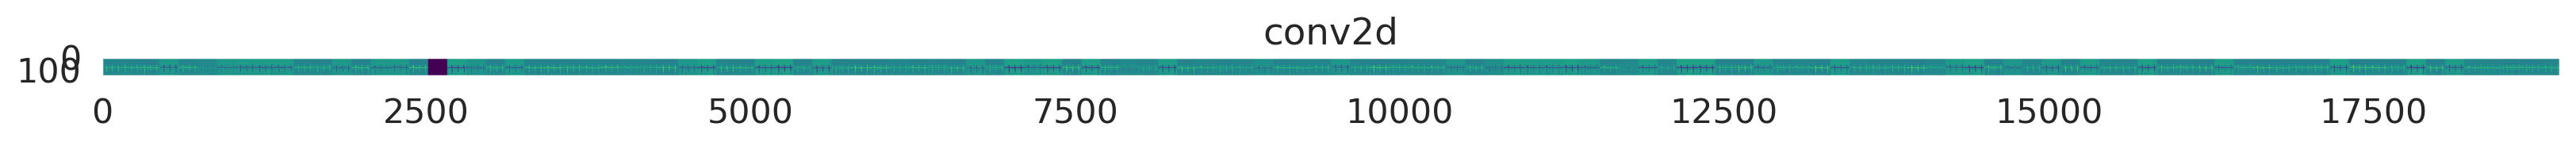

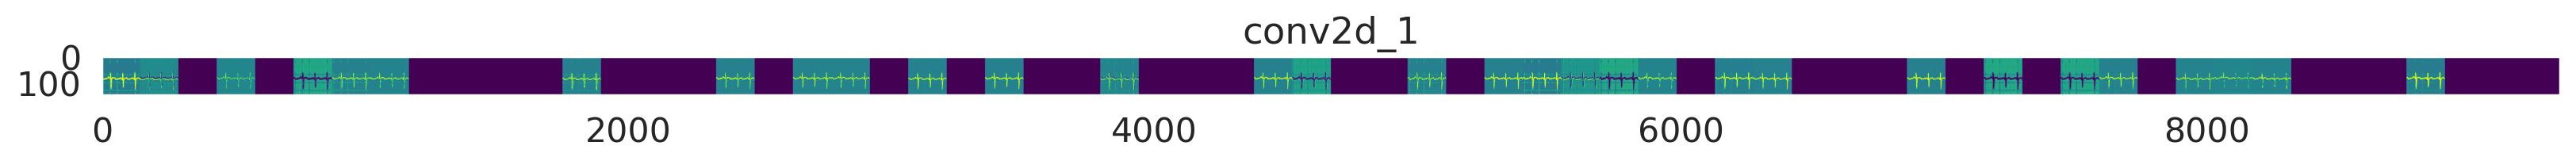

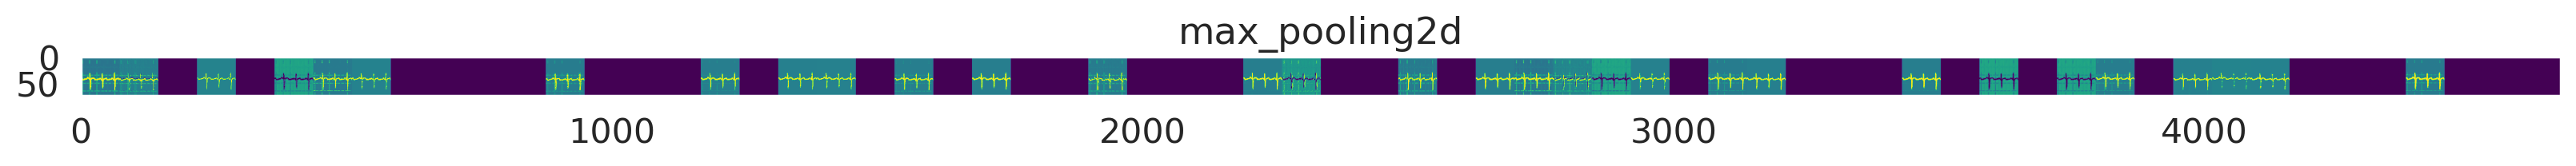

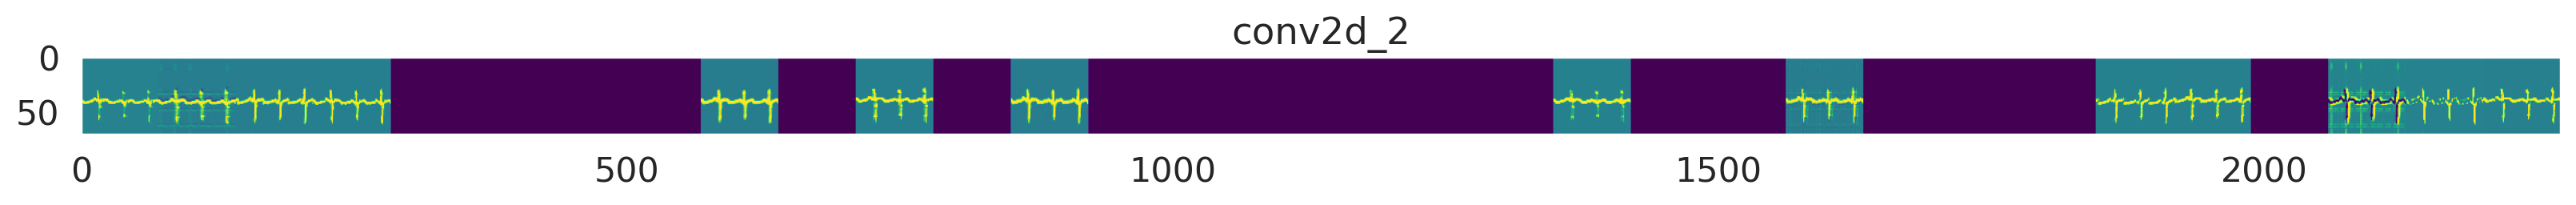

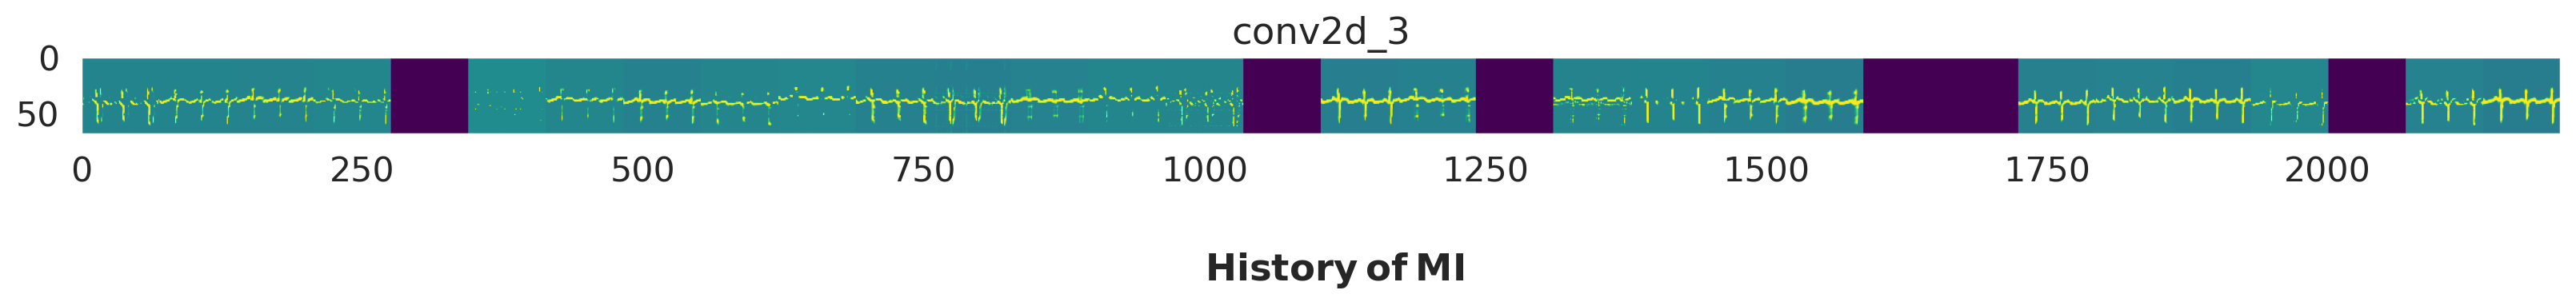

In [43]:
showfeaturemap('/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/PMI/Cropped_Images/PMI_20Cropped_lead4.png')
plt.text(1000,200,r"$\bf{History\: of\: MI}$")
plt.show()

In [44]:
def model_prediction(img_path="/content/MyDrive/MyDrive/ECG/data_v2/NormalPersonECGImages/Cropped_Images/Normal_100Cropped_lead4.png"):
  img = image.load_img(img_path, grayscale=True, target_size=(150,150)) #target_size=(28,28), grayscale=True
  plt.imshow(img)
  img = image.img_to_array(img)
  img = img/255
  img = np.reshape(img,(1,150,150,1))
  img_pred = model.predict(img)
  img_label = np.argmax(img_pred, axis=1)
  # print(img_label)
  if img_label == 0:
    print("The model predicted this ECG to be of a person with a normal heart")
  if img_label == 1:
    print("The model predicted this ECG to be of a person having a Myocardial Infarction(heart attack).  ALERT!")
  if img_label == 2:
    print("The model predicted this ECG to be of a person with an abnormal heart beat.    ALERT!")
  if img_label == 3:
    print("The model predicted this ECG to be of a person with a history of Myocardial Infarction.   ALERT!")


1/1 [==============================] - 0s 168ms/step
The model predicted this ECG to be of a person with an abnormal heart beat.    ALERT!


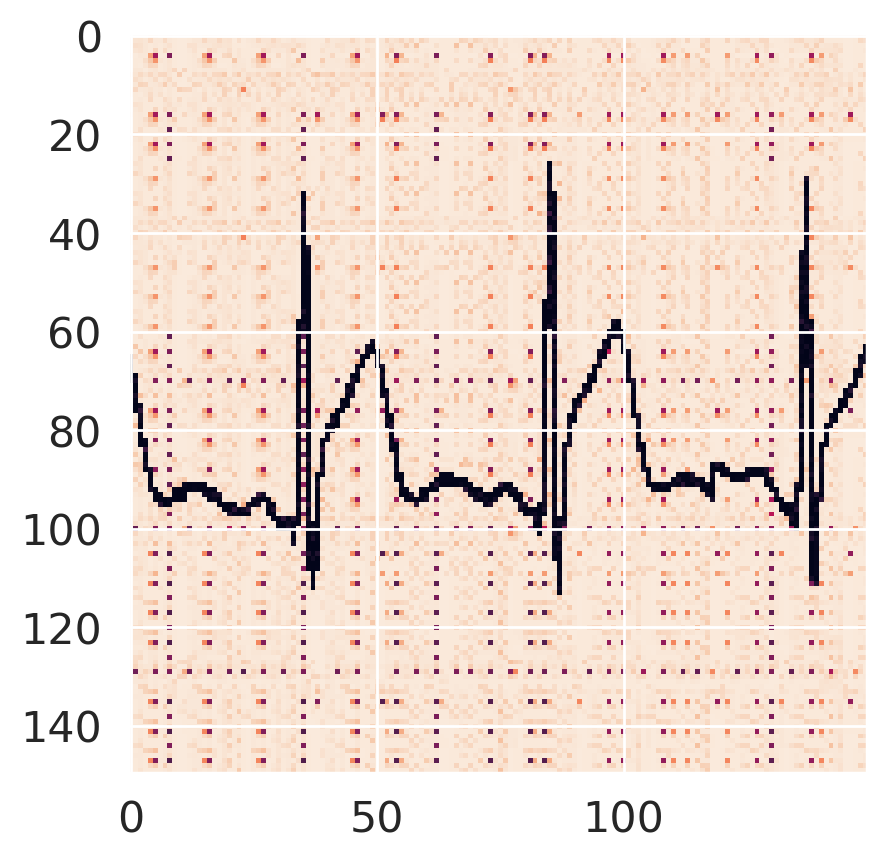

In [45]:
model_prediction("/content/MyDrive/MyDrive/ECG/CroppedECGImages_data_v2/MI/Cropped_Images/MI_20Cropped_lead4.png")